In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rcParams  ## run command settings for plotting

config = {
    "mathtext.fontset":'stix',
    "font.family":'serif',
    "font.serif": ['SimHei'],
    "font.size": 10,   # 字号，大家自行调节
    'axes.unicode_minus': False # 处理负号，即-号
}
rcParams.update(config)  ## 设置画图的一些参数

## 读取数据
path = r'D:/d2l-zh/machine learning/regress_data1.csv'
import pandas as pd
data = pd.read_csv(path) ## data 是dataframe 的数据类型


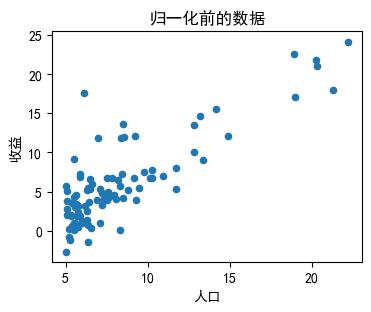

In [21]:
#数据可视化
data.plot(kind='scatter', x='人口', y='收益', figsize=(4,3)) # 利用散点图可视化数据
import matplotlib
plt.xlabel('人口')
plt.ylabel('收益', rotation=90)
plt.title('归一化前的数据')
plt.show()

In [22]:
cols = data.shape[1]
X_data = data.iloc[:,:cols-1]#X是所有行，去掉最后一列
y_data = data.iloc[:,cols-1:]#X是所有行，最后一列

In [23]:
X_data

,人口
0,6.1101
1,5.5277
2,8.5186
3,7.0032
4,5.8598
...,...
91,5.8707
92,5.3054
93,8.2934
94,13.3940


In [24]:
y_data

,收益
0,17.59200
1,9.13020
2,13.66200
3,11.85400
4,6.82330
...,...
91,7.20290
92,1.98690
93,0.14454
94,9.05510


# 分割训练集和测试集

In [25]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.7, random_state=42)
X_train

,人口
55,6.2742
28,22.2030
72,7.2259
70,7.3345
5,8.3829
...,...
60,5.1793
71,6.0062
14,5.6407
92,5.3054


In [26]:
min=X_train['人口'].min()
max=X_train['人口'].max()
X_train['人口']=(X_train["人口"]-min)/(max-min)
X_test['人口']=(X_test["人口"]-min)/(max-min)
X_train

,人口
55,0.072100
28,1.000000
72,0.127539
70,0.133865
5,0.194938
...,...
60,0.008319
71,0.056488
14,0.035196
92,0.015664


# 归一化后的数据

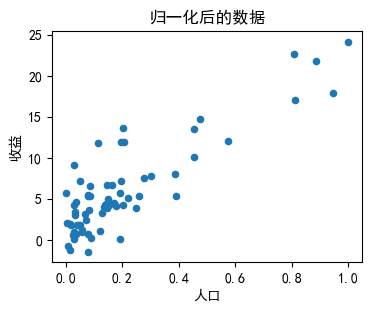

In [27]:
temp = X_train.copy()
temp["收益"] = y_train
temp.plot(kind='scatter', x='人口', y='收益', figsize=(4,3))
import matplotlib
plt.xlabel('人口')
plt.ylabel('收益', rotation=90)
plt.title('归一化后的数据')
plt.show()

In [28]:
X_train.insert(0, 'Ones', 1)
X_test.insert(0, 'Ones', 1)

In [29]:
def computeCost(X, Y, W):
    lamda = 0.01
    Y_hat = X@W
    w_sqr=np.power(W,2)
    sum=np.sum(w_sqr)
    L2=lamda/2*sum
    loss =np.sum((Y_hat - Y)** 2)/(2*X.shape[0])+L2# (m,n) @ (n, 1) -> (n, 1)
    return loss

In [30]:
def gradientDescent(X, Y, W, alpha):
    num_train = X.shape[0]     
    Y_hat = np.dot(X,W)        
    dW = X.T@(Y_hat-Y)/ X.shape[0]
    W += -alpha * dW
    return W

In [31]:
def LSQ(X,Y,w,b):
    w = (np.sum(Y * (X[:, 1:2] - X[:, 1:2].mean()))/(np.sum(X[:, 1:2]**2) - (np.sum(X[:, 1:2]))**2 / X.shape[0]))
    b = np.sum(Y - w * X[:, 1:2]) / X.shape[0]
    return w,b

In [32]:
def linearRegression(X,Y, alpha, iters):
    loss_his = []
    WL = []
    # step1: initialize the model parameters
    feature_dim = X.shape[1]
    W=np.zeros((feature_dim,1)) ## 初始化W系数矩阵，w 是一个(feature_dim,1)矩阵
    ## repeat step 2 and step 3 untill to the convergence or the end of iterations
    for i in range (iters):
        # step2: using the gradient decent method to update the parameters 
        W=gradientDescent(X, Y, W, alpha)
        Wt = W.copy()
        WL.append(Wt)
    return  WL ## 返回损失和模型参数。
    

In [33]:
def predict(X, W):
    y_pre = np.dot(X,W)
    return y_pre
    

# train loss and test loss

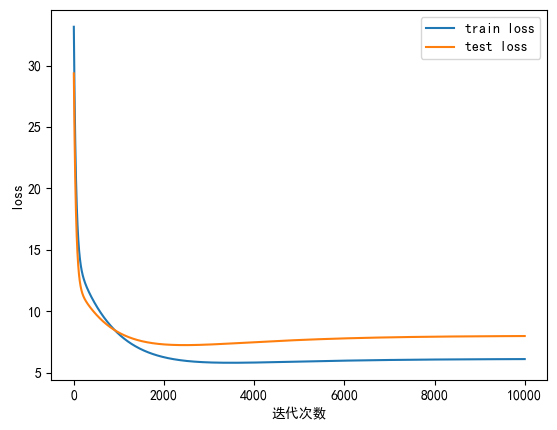

In [37]:
alpha = 0.01
iters = 10000
loss_train = []
loss_test = []
Wt = linearRegression(X_train,y_train, alpha, iters)
for i in range(iters):
    loss_train.append(computeCost(X_train,y_train,Wt[i]))
    loss_test.append(computeCost(X_test,y_test,Wt[i]))
iter = np.arange(iters)
plt.plot(iter,loss_train,label='train loss')
plt.plot(iter,loss_test,label='test loss')
plt.legend()
plt.xlabel('迭代次数')
plt.ylabel('loss')
plt.show()

# LSQ

In [35]:
X = X_train.values
Y = y_train,values
W_LSQ=0
b=0
W_LSQ,b=LSQ(X,Y,W_LSQ,b)

# 预测

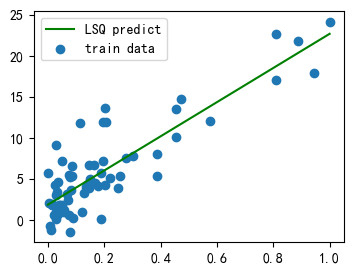

In [44]:
x1 = np.linspace(X_train['人口'].min(),X_train['人口'].max(),100)
y_LSQ = W_LSQ*x1+b
fig,ax = plt.subplots(figsize=(4,3))
ax.plot(x1,y_LSQ,'g',label='LSQ predict')
ax.scatter(X_train['人口'],y_train['收益'],label='train data')
ax.legend()

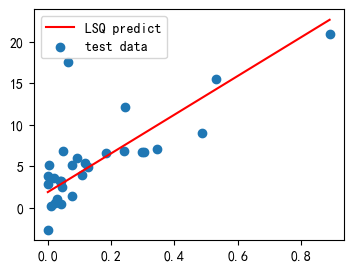

In [47]:
x2 = np.linspace(X_test['人口'].min(),X_test['人口'].max(),100)
y_LSQ = W_LSQ*x1+b
fig,ax = plt.subplots(figsize=(4,3))
ax.plot(x2,y_LSQ,'r',label='LSQ predict')
ax.scatter(X_test['人口'],y_test['收益'],label='test data')
ax.legend()